In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1. Работа с массивами NumPy

**N. Все упражнения ниже нужно делать без использования циклов Python**

**1.** Cоздать вектор

$$(2, \frac{2^2}{2}, \ldots, \frac{2^{20}}{20})$$

Можно использовать функции [np.arange()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html), [np.ones()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html)

In [2]:
2 ** np.arange(1, 21) / np.arange(1, 21)

array([2.00000000e+00, 2.00000000e+00, 2.66666667e+00, 4.00000000e+00,
       6.40000000e+00, 1.06666667e+01, 1.82857143e+01, 3.20000000e+01,
       5.68888889e+01, 1.02400000e+02, 1.86181818e+02, 3.41333333e+02,
       6.30153846e+02, 1.17028571e+03, 2.18453333e+03, 4.09600000e+03,
       7.71011765e+03, 1.45635556e+04, 2.75941053e+04, 5.24288000e+04])

**2.** Посчитать:

$$\sum\limits_{i=0}^{5}{0.1^{3i}0.2^{4i}}$$


In [16]:
(0.1 ** (3 * np.arange(0, 6))) @ (0.2 ** (4 * np.arange(0, 6)))

1.00000160000256

**3.** Создать нулевую матрицe $8 \times 8$, и заполнить её единицами в шахматном порядке.

In [4]:
matrix = np.zeros((8, 8))
matrix[1::2,::2] = 1
matrix[::2, 1::2] = 1
matrix

array([[0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.]])

**4.** Есть 5 точек в декартовой системе координат (в виде матрицы $X$ размерностью $5 \times 2$), сконвертируйте эти точки в полярную систему координат.

In [24]:
X = np.random.random((5, 2))

# print(X)

dist = np.sqrt((X @ X.T)[np.identity(5) > 0]).reshape((5,1))
corn = np.arctan(X[:,1] / X[:,0]).reshape((5,1))
np.concatenate((dist, corn), axis=1)

# проверка
# print(dist * np.cos(corn))
# print(dist * np.sin(corn))

array([[0.65334458, 0.08639976],
       [1.01806953, 0.50596317],
       [0.96112223, 0.94846464],
       [0.92869041, 1.19608126],
       [0.56241899, 0.80183517]])

**5.** Найдите индексы максимального элемента в случайной матрице $10 \times 10$.

Cм. [np.argmax()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html).

In [6]:
X = np.random.random((10, 10))

(np.argmax(X)//10, np.argmax(X)%10) 


(7, 3)

**6.** Есть 10 точек ($X$) и ещё одна ($y$). Найти в $X$ ближайшую к $y$ точку.

array([0.42818023, 0.84051244])

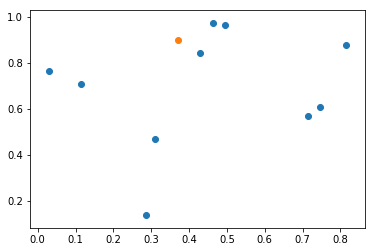

In [25]:
X = np.random.random((10, 2))
y = np.random.random((1, 2))

dist = (X - y) @ (X - y).T
dist = dist[np.identity(10) > 0]
plt.scatter(X[:,0], X[:,1])
plt.scatter(y[:,0], y[:,1])
X[np.argmin(dist)]

**7.** Дана функция:

$$
 \begin{cases}
    x^2 + 2x + 6, & x < 0  \\
    x + 6, & 0 \le x \le 2 \\
    x^2 + 4x - 4, & x \ge 2
 \end{cases}
$$

Постройте массив из её значений на  $-3 \le x \le 3$.

In [8]:
m = 6 # кол-во точек

np.concatenate((((np.linspace(-3,0,int(m/2 + 1))[:-1]) ** 2 + 2 * (np.linspace(-3,0,int(m/2 + 1))[:-1]) + 6), 
 ((np.linspace(0,2,int(m/3 + 1))[:-1]) + 6),((np.linspace(0,2,int(m/6))) ** 2 + 4 * (np.linspace(0,2,int(m/6))) - 4)))

array([ 9.,  6.,  5.,  6.,  7., -4.])

**8.** Из каждого элемента матрицы вычесть среднее арифметическое от всех элементов в соответствующей строке (после чего среднее значение каждой строки должно равняться нулю).

Cм. [np.mean()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html).

In [26]:
X = np.random.random((10, 10))

result = X - (np.ones((10,10)) * np.mean(X, axis = 1)).T
np.mean(result, axis = 1)

array([ 2.22044605e-17,  0.00000000e+00, -4.44089210e-17,  3.33066907e-17,
        2.22044605e-17,  8.88178420e-17, -3.33066907e-17, -4.99600361e-17,
        1.11022302e-17,  7.77156117e-17])

**9.** Есть массив из 1000 чисел, полученных из генератора случайных чисел, имеющий нормальное распределение. Посчитайте выборочное среднее и выборочную дисперсию. 

In [10]:
X = np.random.normal(loc=5, scale=2., size=1000)

print('выборочное среднее')
print(np.sum(X)/1000)
print('выборочная дисперсия')
print((np.sum(X**2)/1000) - (np.sum(X)/1000)**2)


выборочное среднее
5.101464740100701
выборочная дисперсия
3.7592762777821314


**10.** Создать матрицу:

$$
\begin{pmatrix}
0 & 1 & 2 & 3 & 4 \\
1 & 2 & 3 & 4 & 0 \\
2 & 3 & 4 & 0 & 1 \\
3 & 4 & 0 & 1 & 2 \\
4 & 0 & 1 & 2 & 3
\end{pmatrix}
$$

In [12]:
base = (np.arange(0, 5) * np.ones((6,5))).reshape((1,30))

np.delete(np.delete(np.delete(np.delete(np.delete(base, [5]), [10]), [15]), [20]), [25]).reshape((5,5))

array([[0., 1., 2., 3., 4.],
       [1., 2., 3., 4., 0.],
       [2., 3., 4., 0., 1.],
       [3., 4., 0., 1., 2.],
       [4., 0., 1., 2., 3.]])